In [1]:
# !pip install pandas_datareader

In [2]:
import pandas_datareader as pdr
import pandas as pd
import numpy as np 
import seaborn as sns 

In [4]:
df1 = pdr.get_data_yahoo('msft')
df1.shape

(1258, 6)

In [5]:
df1.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-08-20,46.470001,45.660000,46.070000,45.660000,36238200.0,41.595905
2015-08-21,45.480000,43.070000,45.299999,43.070000,70053100.0,39.236439
2015-08-24,42.689999,39.720001,40.450001,41.680000,88753700.0,37.970146
2015-08-25,43.240002,40.389999,42.570000,40.470001,70616600.0,36.867855
2015-08-26,42.840000,41.060001,42.009998,42.709999,63408000.0,38.908478


In [6]:
df1.describe()

,High,Low,Open,Close,Volume,Adj Close
count,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03,1258.000000
mean,99.105342,97.193665,98.183299,98.216351,2.994562e+07,95.546453
std,43.772694,42.626828,43.228011,43.251037,1.468589e+07,44.462047
min,42.590000,39.720001,40.450001,40.470001,7.425600e+06,36.867855
25%,60.637500,59.922499,60.309999,60.282498,2.068352e+07,56.635150
50%,93.064999,90.510002,91.485001,91.755001,2.610305e+07,88.492332
75%,127.992500,126.030003,126.717501,127.072498,3.421770e+07,125.298456
max,217.639999,211.570007,216.330002,216.539993,1.352271e+08,216.539993


In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2015-08-20 to 2020-08-18
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       1258 non-null   float64
 1   Low        1258 non-null   float64
 2   Open       1258 non-null   float64
 3   Close      1258 non-null   float64
 4   Volume     1258 non-null   float64
 5   Adj Close  1258 non-null   float64
dtypes: float64(6)
memory usage: 68.8 KB


In [9]:
df2 = df1.reset_index()

In [10]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1258 non-null   datetime64[ns]
 1   High       1258 non-null   float64       
 2   Low        1258 non-null   float64       
 3   Open       1258 non-null   float64       
 4   Close      1258 non-null   float64       
 5   Volume     1258 non-null   float64       
 6   Adj Close  1258 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 68.9 KB


In [13]:
df2['Year'] = df2['Date'].dt.year

In [14]:
df2.head()

,Date,High,Low,Open,Close,Volume,Adj Close,Year
0,2015-08-20,46.470001,45.660000,46.070000,45.660000,36238200.0,41.595905,2015
1,2015-08-21,45.480000,43.070000,45.299999,43.070000,70053100.0,39.236439,2015
2,2015-08-24,42.689999,39.720001,40.450001,41.680000,88753700.0,37.970146,2015
3,2015-08-25,43.240002,40.389999,42.570000,40.470001,70616600.0,36.867855,2015
4,2015-08-26,42.840000,41.060001,42.009998,42.709999,63408000.0,38.908478,2015


In [15]:
df2['work_week'] = df2['Date'].dt.week
df2['month'] = df2['Date'].dt.month
df2['day_of_week'] = df2['Date'].dt.day_name()

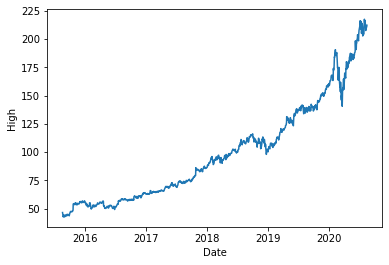

In [17]:
sns.lineplot(data=df2, x='Date',y='High')

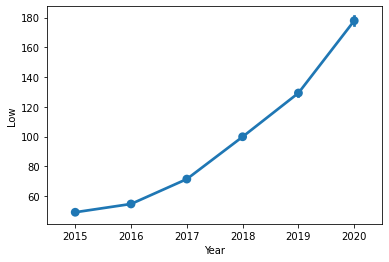

In [20]:
sns.pointplot(data=df2, x='Year',y='Low')

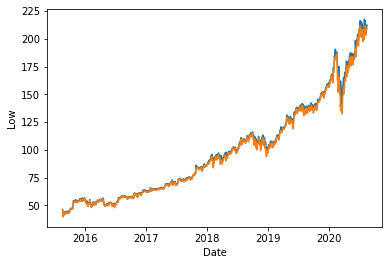

In [21]:
sns.lineplot(data=df2, x='Date',y='High')
sns.lineplot(data=df2, x='Date',y='Low')

In [23]:
cond1 = ((df2['Year']==2019) | (df2['Year']==2020))
df2_1920 = df2.loc[cond1]

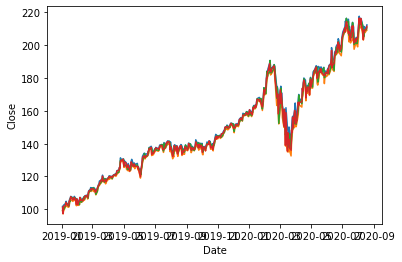

In [24]:
sns.lineplot(data=df2_1920, x='Date', y='High')
sns.lineplot(data=df2_1920, x='Date', y='Low')
sns.lineplot(data=df2_1920, x='Date', y='Open')
sns.lineplot(data=df2_1920, x='Date', y='Close')

In [25]:
import matplotlib.pyplot as plt 

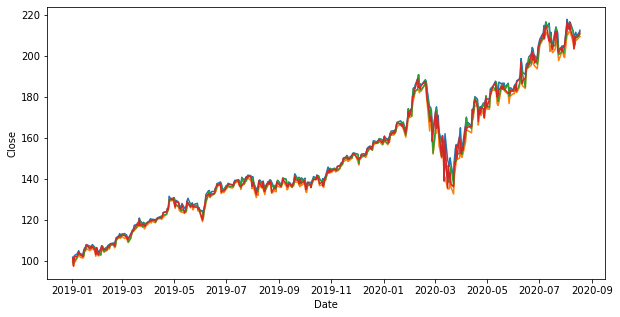

In [28]:
plt.figure(figsize=[10,5])
sns.lineplot(data=df2_1920, x='Date', y='High')
sns.lineplot(data=df2_1920, x='Date', y='Low')
sns.lineplot(data=df2_1920, x='Date', y='Open')
sns.lineplot(data=df2_1920, x='Date', y='Close')

In [34]:
import matplotlib as mpl
mpl.rc('font',family='Malgun Gothic')

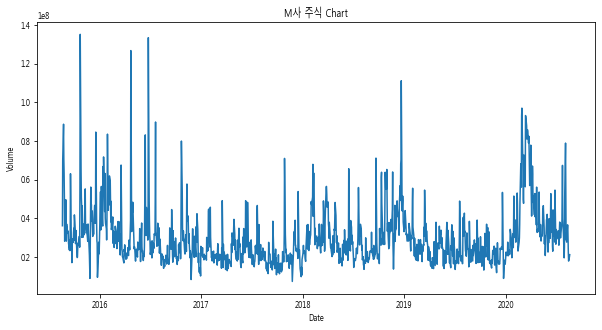

In [37]:
plt.figure(figsize=[10,5])
plt.title('M사 주식 Chart')
img = sns.lineplot(data=df2, x='Date', y='Volume')
img.get_figure().savefig('Chart.pdf')

In [38]:
pd.pivot_table(data=df2, index='Year',values='Volume')

,Volume
Year,
2015,3.685963e+07
2016,3.103066e+07
2017,2.243617e+07
2018,3.159019e+07
2019,2.458279e+07
2020,4.193990e+07


In [41]:
df3 = df2[['Date','Open']]

In [42]:
df3

,Date,Open
0,2015-08-20,46.070000
1,2015-08-21,45.299999
2,2015-08-24,40.450001
3,2015-08-25,42.570000
4,2015-08-26,42.009998
...,...,...
1253,2020-08-12,205.289993
1254,2020-08-13,209.440002
1255,2020-08-14,208.759995
1256,2020-08-17,209.600006


In [43]:
import statsmodels.api as sm 
import warnings 
import itertools
from pylab import rcParams 

In [44]:
rcParams['figure.figsize'] = 15,10

In [45]:
#차트 기본 크기 설정
mpl.rcParams['axes.labelsize'] = 14
mpl.rcParams['xtick.labelsize'] = 12
mpl.rcParams['ytick.labelsize'] = 12
mpl.rcParams['text.color'] = 'k'

In [48]:
data1 = df3.set_index('Date')

In [51]:
y = data1['Open'].resample('1W').mean()

<ipython-input-59-7a47d0d0d8eb>:1: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  decomposition= sm.tsa.seasonal_decompose(y, freq= 11, model='additive')


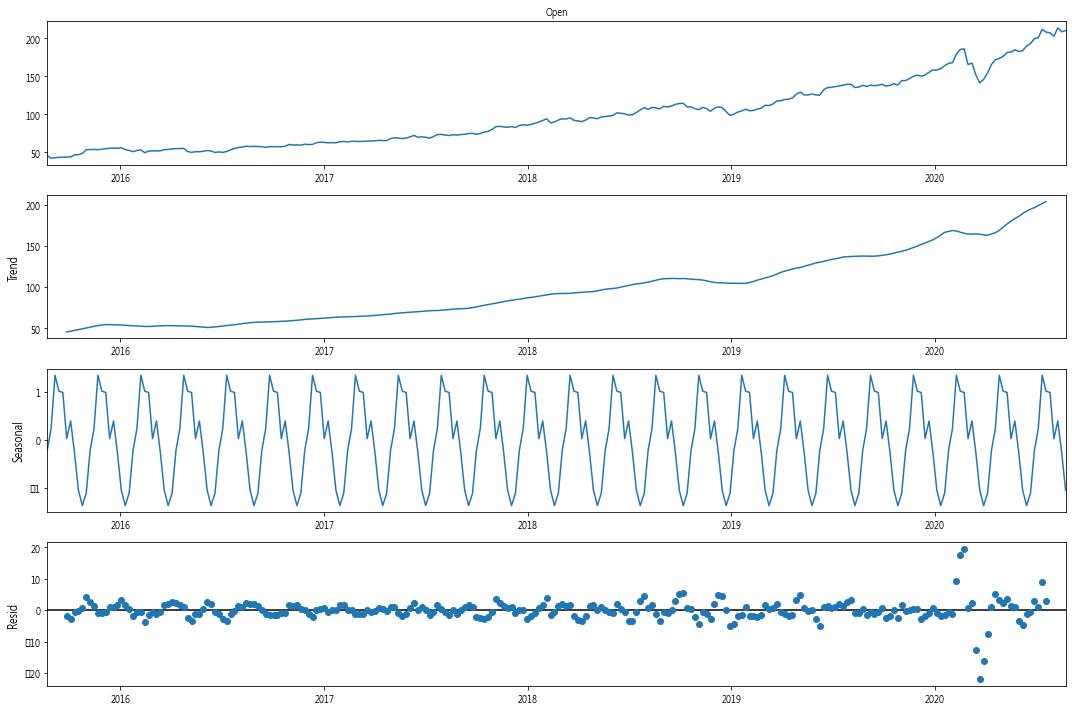

In [59]:
decomposition= sm.tsa.seasonal_decompose(y, freq= 11, model='additive')
fig = decomposition.plot()
plt.show()

In [60]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [61]:
param_list = []
param_seasonal_list = []
results_AIC_list = []

In [65]:
for param in pdq:
     for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            param_list.append(param)
            param_seasonal_list.append(param_seasonal)
            results_AIC_list.append(results.aic)
        except:
             continue

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Ma

In [67]:
ARIMA_list = pd.DataFrame({'Parameter':param_list,'Seasonal':param_seasonal_list,
             'AIC':results_AIC_list})
ARIMA_list.to_excel('arima_model_list.xlsx')

In [69]:
ARIMA_list.sort_values(by='AIC')

,Parameter,Seasonal,AIC
87,"(0, 1, 1)","(0, 1, 1, 12)",1222.337943
23,"(0, 1, 1)","(0, 1, 1, 12)",1222.337943
119,"(1, 1, 1)","(0, 1, 1, 12)",1223.732459
55,"(1, 1, 1)","(0, 1, 1, 12)",1223.732459
91,"(0, 1, 1)","(1, 1, 1, 12)",1224.515739
...,...,...,...
68,"(0, 0, 1)","(0, 0, 0, 12)",2829.676013
61,"(0, 0, 0)","(0, 0, 1, 12)",3052.867632
1,"(0, 0, 0)","(0, 0, 1, 12)",3052.867632
60,"(0, 0, 0)","(0, 0, 0, 12)",3184.954613


In [70]:
mod = sm.tsa.statespace.SARIMAX(y,
                                 order=(0, 1, 1),
                                 seasonal_order=(0, 1, 1, 12),
                                 enforce_stationarity=False,
                                 enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.1106      0.038      2.882      0.004       0.035       0.186
ma.S.L12      -0.8528      0.046    -18.342      0.000      -0.944      -0.762
sigma2         9.9819      0.362     27.601      0.000       9.273      10.691


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


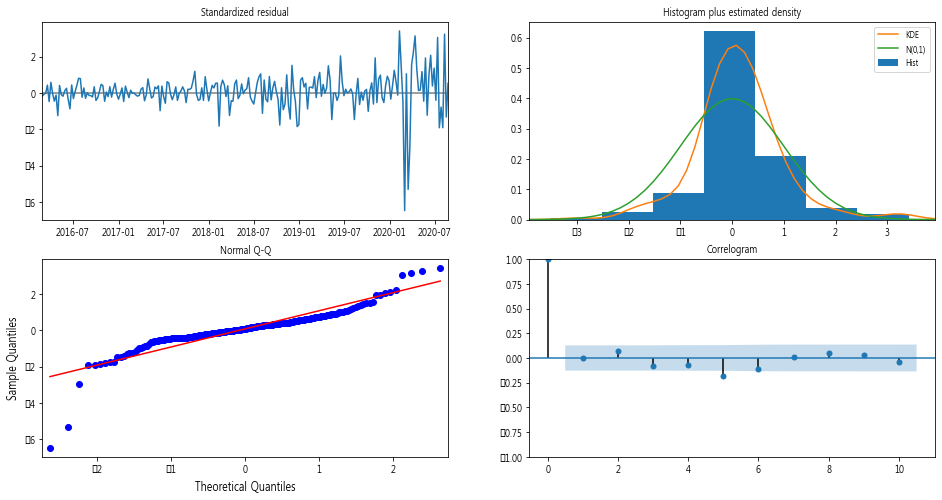

In [71]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

In [78]:
results.get_prediction()

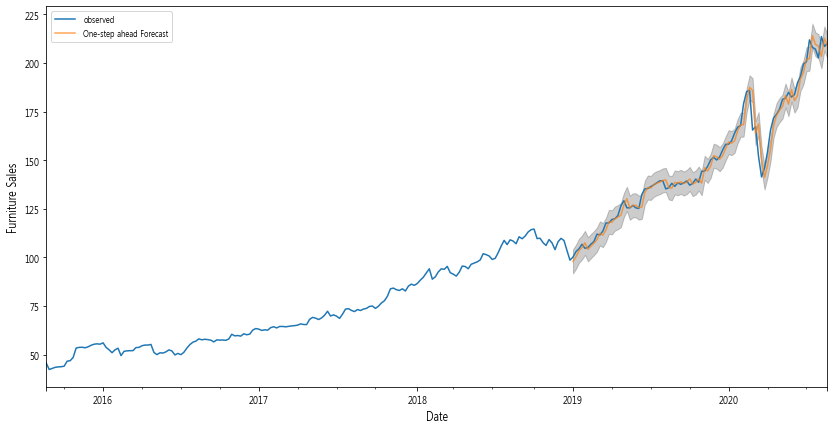

In [80]:
pred = results.get_prediction(start=pd.to_datetime('2019-01-06'), dynamic=False)
pred_ci = pred.conf_int() #추정된 계수의 신뢰구간 계산

ax = y.plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,pred_ci.iloc[:, 0],pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()

In [81]:
y_forecasted = pred.predicted_mean
y_truth = y['2017-01-01':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('MSE {}'.format(round(mse, 2)))

MSE 21.67


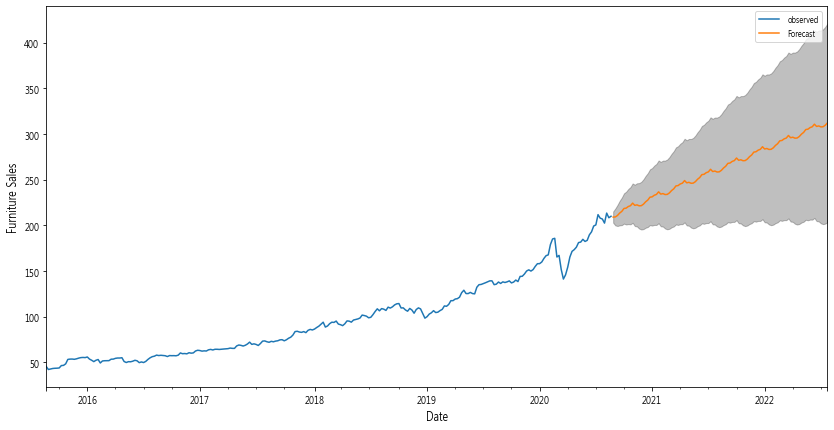

In [82]:
pred_uc = results.get_forecast(steps=100)
pred_ci = pred_uc.conf_int() #추정된 계수의 신뢰구간 계산
ax = y.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                 pred_ci.iloc[:, 0],
                 pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()